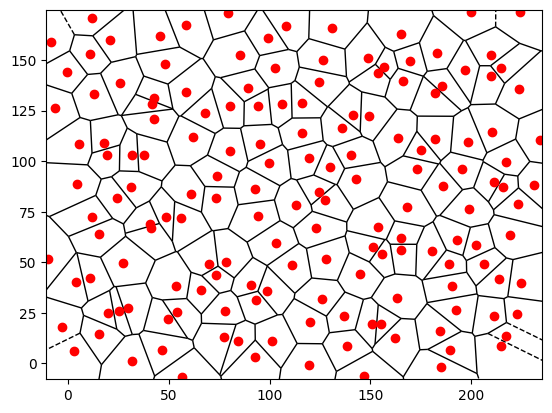

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d
from numpy import sin, cos, pi
import random

l = 17.5
sigma = 0.30
# Erstellen einer Punktewolke
Points = []
for j in range(20):
    for i in range(8):
        if j%2 == 0:
            Points.append([l * (i * 2 * cos(pi/6)+random.gauss(0, sigma)), l * (j * sin(pi/6) + random.gauss(0, sigma))])
        else:  
            Points.append([l * ((1 + i * 2) * cos(pi/6)+random.gauss(0, sigma)), l * (j * sin(pi/6) + random.gauss(0, sigma))])
# Berechnen des Voronoi-Diagramms
Points = np.array(Points)
vor = Voronoi(Points)

# Visualisierung des Voronoi-Diagramms
fig, ax = plt.subplots()
voronoi_plot_2d(vor, ax=ax, show_vertices=False)
ax.plot(Points[:,0], Points[:,1], 'ro')  # zeichne die Punkte

# Setzt die Achsen auf gleiche Skalierung
ax.axis('equal')

# Zoom in den Bereich der Punkte
x_min, x_max = Points[:,0].min() - 1, Points[:,0].max() + 1  # etwas Rand hinzufügen
y_min, y_max = Points[:,1].min() - 1, Points[:,1].max() + 1  # etwas Rand hinzufügen
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)

plt.show()

(15.0, 80.0)

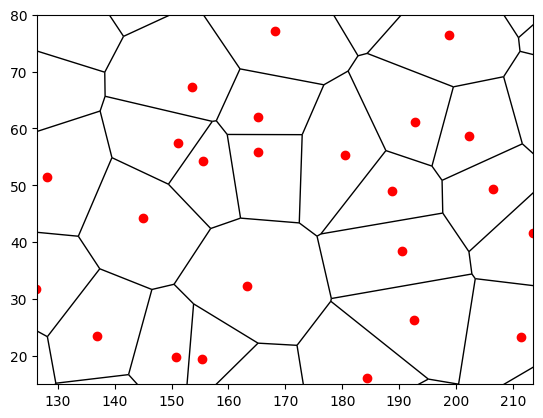

In [55]:
# Visualisierung des Voronoi-Diagramms
fig, ax = plt.subplots()
voronoi_plot_2d(vor, ax=ax, show_vertices=False)
ax.plot(Points[:,0], Points[:,1], 'ro')  # zeichne die Punkte

# Setzt die Achsen auf gleiche Skalierung
ax.axis('equal')

# Zoom in den Bereich der Punkte
x_min, x_max = Points[:,0].min() - 1, Points[:,0].max() + 1  # etwas Rand hinzufügen
y_min, y_max = Points[:,1].min() - 1, Points[:,1].max() + 1  # etwas Rand hinzufügen
ax.set_xlim(140, 200)
ax.set_ylim(15, 80)

In [44]:
vor.vertices

array([[ 2.17122683e+02,  4.70088011e+02],
       [ 1.54253407e+02, -2.32057158e+03],
       [ 1.34663459e+02, -1.44675149e+03],
       [ 1.95101924e+02,  1.55917059e+02],
       [ 1.84885428e+02,  1.70040178e+02],
       [ 2.01663783e+02,  1.54170892e+02],
       [ 2.13081071e+02,  1.67384065e+02],
       [ 2.19687211e+02,  1.25443389e+02],
       [ 2.15913217e+02,  1.28343591e+02],
       [ 2.12750596e+02,  1.28573681e+02],
       [ 2.05196665e+02,  1.43559309e+02],
       [ 2.06758707e+02,  1.42243587e+02],
       [ 1.44398006e+02,  4.36266239e+02],
       [ 1.24390888e+02, -2.73981957e+02],
       [ 7.53927274e+01,  2.36488724e+02],
       [ 8.02308357e-01,  1.50342866e+02],
       [ 3.60830846e+02,  1.57027716e+02],
       [ 2.30233714e+02,  1.41363906e+02],
       [ 2.21399530e+02,  1.59064935e+02],
       [ 2.20935157e+02,  1.49529138e+02],
       [ 1.72263386e+02,  1.57551846e+02],
       [ 5.00430394e+02,  2.41822875e+01],
       [ 2.26899189e+02,  3.21053473e+01],
       [ 2.

(-13.14737388697774, 181.4529648200117)

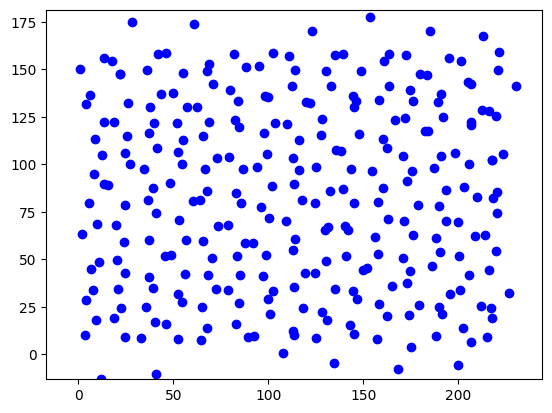

In [45]:
vertices = vor.vertices

fig, ax = plt.subplots()
ax.plot(vertices[:, 0], vertices[:, 1], 'bo')  # Plot the vertices
ax.axis('equal')

x_min, x_max = Points[:,0].min() - 1, Points[:,0].max() + 1  # etwas Rand hinzufügen
y_min, y_max = Points[:,1].min() - 1, Points[:,1].max() + 1  # etwas Rand hinzufügen
ax.set_xlim(x_min-10, x_max+10)
ax.set_ylim(y_min-10, y_max+10)

(-13.14737388697774, 181.4529648200117)

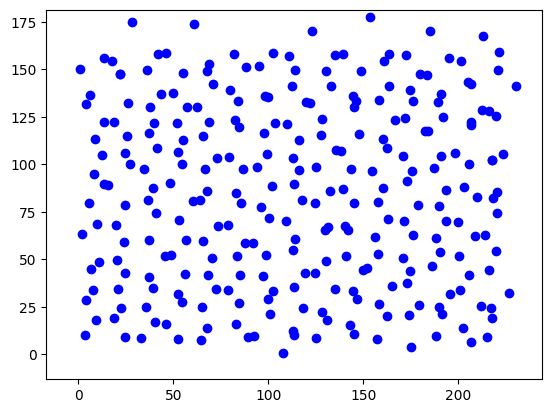

In [46]:
for i in range(len(vertices)):
    if vertices[i][1] < 0:
        vertices[i] = np.nan  # Replace the entire vertex with NaN

# Remove any rows containing NaN values from the vertices array
vertices = vertices[~np.isnan(vertices).any(axis=1)]

fig, ax = plt.subplots()
ax.plot(vertices[:, 0], vertices[:, 1], 'bo')  # Plot the vertices
ax.axis('equal')

x_min, x_max = Points[:,0].min() - 1, Points[:,0].max() + 1  # etwas Rand hinzufügen
y_min, y_max = Points[:,1].min() - 1, Points[:,1].max() + 1  # etwas Rand hinzufügen
ax.set_xlim(x_min-10, x_max+10)
ax.set_ylim(y_min-10, y_max+10)

In [47]:
firstThread = []

def SearchClosest(loc, vertices):
    rangekey = []
    for i in range(len(vertices)):
        point = vertices[i]
        rangekey.append((point[0]-loc[0])**2 + (point[1]-loc[1])**2)

    closest_index = rangekey.index(min(rangekey))

    return closest_index

firstThread.append(vertices[SearchClosest([0,0], vertices)])

for i in range(10):
    next = [firstThread[-1][0] + cos(pi/3) * l/2, firstThread[-1][1] + sin(pi/3) * l/2]
    firstThread.append(vertices[SearchClosest(next, vertices)])
    next = [firstThread[-1][0] + l/2, firstThread[-1][1]]
    firstThread.append(vertices[SearchClosest(next, vertices)])
    next = [firstThread[-1][0] + cos(pi/3) * l/2, firstThread[-1][1] - sin(pi/3) * l/2]
    firstThread.append(vertices[SearchClosest(next, vertices)])
    next = [firstThread[-1][0] + l/2, firstThread[-1][1]]
    firstThread.append(vertices[SearchClosest(next, vertices)])

firstThread

Threads = [firstThread]

for i in range(21):
    lastThread = Threads[-1]
    nextThread = []
    if i%2 == 0:
        next = [lastThread[0][0], lastThread[0][1] + l]
        nextThread.append(vertices[SearchClosest(next, vertices)])

        j = 1
        while j < 40:
            nextThread.append(lastThread[j])
            j+=1
            nextThread.append(lastThread[j])
            j+=1
            next = [nextThread[-1][0] + cos(pi/3) * l/2, nextThread[-1][1] + sin(pi/3) * l/2]
            nextThread.append(vertices[SearchClosest(next, vertices)])
            j+=1
            next = [nextThread[-1][0] + l/2, nextThread[-1][1]]
            nextThread.append(vertices[SearchClosest(next, vertices)])
            j+=1
    else:
        nextThread.append(lastThread[0])

        j = 1

        while j < 40:
            next = [nextThread[-1][0] + cos(pi/3) * l/2, nextThread[-1][1] + sin(pi/3) * l/2]
            nextThread.append(vertices[SearchClosest(next, vertices)])
            j+=1
            next = [nextThread[-1][0] + l/2, nextThread[-1][1]]
            nextThread.append(vertices[SearchClosest(next, vertices)])
            j+=1
            nextThread.append(lastThread[j])
            j+=1
            nextThread.append(lastThread[j])
            j+=1
    Threads.append(nextThread)
Threads

[[array([ 3.69128075, 10.39904084]),
  array([ 9.40347429, 18.30722769]),
  array([18.68131822, 19.00929193]),
  array([24.5189309 ,  8.92794831]),
  array([33.11251985,  8.39936461]),
  array([40.55051493, 16.81780905]),
  array([45.97056174, 15.91742211]),
  array([52.35450736,  8.16499661]),
  array([64.5923536 ,  7.43728225]),
  array([67.56279623, 13.60986284]),
  array([83.04788663, 16.06436463]),
  array([89.11020506,  9.2090166 ]),
  array([92.31042042,  9.6276375 ]),
  array([100.885334  ,  21.19033832]),
  array([100.885334  ,  21.19033832]),
  array([113.22058866,  12.34281163]),
  array([124.86891915,   8.47813142]),
  array([130.80008945,  18.14421046]),
  array([143.11029078,  15.54071111]),
  array([145.02291138,  10.89549482]),
  array([157.37459113,   8.17457887]),
  array([162.64462701,  20.2326233 ]),
  array([173.81122303,  20.92238294]),
  array([173.81122303,  20.92238294]),
  array([179.38773358,  26.1871707 ]),
  array([179.38773358,  26.1871707 ]),
  array([190

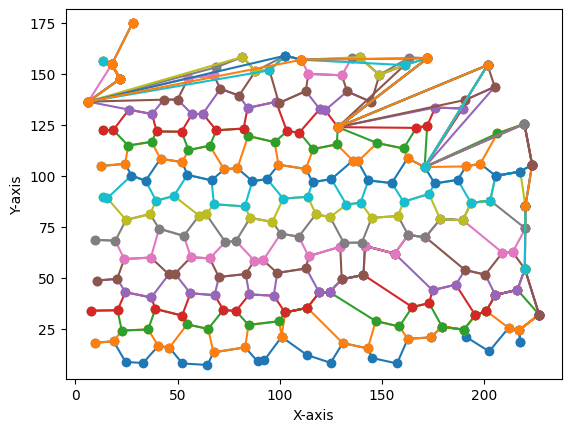

In [48]:
for i in range(len(Threads)):
    Threads[i] = Threads[i][1:-2]
    
    # Assume Threads is a list of lists of points (as you have shown)
fig, ax = plt.subplots()

# Loop through each thread and plot it
for idx, thread in enumerate(Threads):
    # Extract x and y coordinates from each thread
    x_values = [point[0] for point in thread]
    y_values = [point[1] for point in thread]
    
    # Plot the thread with markers for each point
    ax.plot(x_values, y_values, marker='o', label=f'Thread {idx + 1}')

# Optionally add labels and a legend
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
# ax.legend()
ax.axis('equal')

# Show the plot
plt.show()

In [49]:
# Function to write threads to a text file in the desired format
def write_threads_to_file(threads, filename="output_threads.txt"):
    with open(filename, 'w') as f:
        for idx, thread in enumerate(threads, start=1):
            f.write(f"Thread {idx}:\n")
            for point in thread:
                f.write(f"  {float(point[0])}, {float(point[1])}\n")
            f.write("\n")  # Add a new line after each thread

# Assuming Threads is your list of threads, call the function
# write_threads_to_file(Threads, "output_threads.txt")